In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
cart = pd.read_excel("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/raw_data/cd_cart_square.xlsx")

In [3]:
cart.shape

(435, 6)

In [4]:
#create unique district codes
cart["dist"] = cart["dist"].astype(str)
cart["dist"] = np.where(cart["dist"].str[0] == "0", "AL", cart["dist"])
cart["ST#"] = cart["ST"] + cart["dist"].astype(str)
cart.shape

(435, 7)

In [5]:
#load in other relevant data
data_118 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_118.csv")
converter = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/processed/metric_converter.csv")

In [6]:
len(data_118["ST#"].unique())

435

In [7]:
converter

,metric,pvi_range,prob_GOP
0,0.06,D+26+,0.000000
1,0.07,D+26+,0.000000
2,0.08,D+26+,0.000000
3,0.09,D+26+,0.000000
4,0.10,D+26+,0.000000
5,0.11,D+26+,0.000000
6,0.12,D+26+,0.000000
7,0.13,D+26+,0.000000
8,0.14,D+26+,0.000000
9,0.15,D+26+,0.000000


In [8]:
#merge
cart = cart.merge(data_118.drop(columns="ST"), on='ST#')
cart = cart.merge(converter, on="metric")

In [9]:
print(cart.shape)
cart.head()

(435, 14)


,FIPS,X,Y,State,ST,dist,ST#,year,congress,PVI,metric,lean,pvi_range,prob_GOP
0,1,24,24,Alabama,AL,4,AL4,2022,118,R+33,0.83,NaN,R+21+,1.000000
1,1,25,24,Alabama,AL,5,AL5,2022,118,R+17,0.67,NaN,R+8 to R+20,0.953509
2,1,25,26,Alabama,AL,2,AL2,2022,118,R+17,0.67,NaN,R+8 to R+20,0.953509
3,12,29,28,Florida,FL,12,FL12,2022,118,R+17,0.67,NaN,R+8 to R+20,0.953509
4,21,27,17,Kentucky,KY,4,KY4,2022,118,R+17,0.67,NaN,R+8 to R+20,0.953509


In [10]:
prev_states = ["FL","NH","MO"]
cart['State Status'] = np.where(cart["ST"].isin(prev_states), 'Incomplete Map', 'Complete Map')

In [11]:
X = np.repeat(1,23), np.repeat(2,23), np.repeat(3,23),np.repeat(4,23),np.repeat(5,21),np.repeat(6,19),np.repeat(7,17),np.repeat(8,15),np.repeat(9,13),np.repeat(10,11),np.repeat(11,9),np.repeat(12,7),np.repeat(13,5),np.repeat(14,3),np.repeat(15,3),np.repeat(16,1),np.repeat(17,1),np.repeat(21,1),np.repeat(25,1),np.repeat(26,1),np.repeat(27,3),np.repeat(28,3),np.repeat(29,5),np.repeat(30,7),np.repeat(31,9),np.repeat(32,11),np.repeat(33,13),np.repeat(34,15),np.repeat(35,17),np.repeat(36,19),np.repeat(37,21),np.repeat(38,23),np.repeat(39,23),np.repeat(40,23),np.repeat(41,23)

In [12]:
#create a better range function
def btw(j,k):
    return list(range(j,k))

In [13]:
Y = [btw(4,27),btw(4,27),btw(4,27),btw(4,27),btw(5,26),btw(6,25),btw(7,24),btw(8,23),btw(9,22),btw(10,21),btw(11,20),btw(12,19),btw(13,18),btw(14,17),btw(14,17),15,15,15,15,15,btw(14,17),btw(14,17),btw(13,18),btw(12,19),btw(11,20),btw(10,21),btw(9,22),btw(8,23),btw(7,24),btw(6,25),btw(5,26),btw(4,27),btw(4,27),btw(4,27),btw(4,27)]

In [14]:
X = [item for sublist in X for item in sublist]
from iteration_utilities import deepflatten
Y = list(deepflatten(Y))

In [15]:
print(len(X),len(Y))

435 435


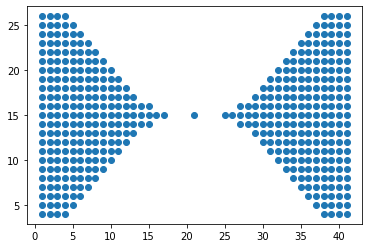

In [16]:
div = cart.sort_values(["metric","ST"])
div = div.drop(columns=["X","Y"])
div["X"] = X
div["Y"] = Y
#check shape
import matplotlib.pyplot as plt
plt.scatter(div.X,div.Y)

In [17]:
cart["View"] = "Cartogram"
div["View"] = "Median District"

In [18]:
square = pd.concat([cart,div])

In [19]:
square.to_excel("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/processed/cd_cart_square_118.xlsx", index = False)

In [20]:
#offset every other row so the hexes will align
div["X"] = np.where(((div["Y"] % 2) != 0) & (div["X"] > 22), div['X'], (div["X"] - .5))
div["X"] = np.where(((div["Y"] % 2) != 0) & (div["X"] < 20), div['X'], (div["X"] + .5))

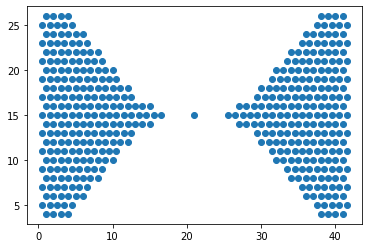

In [21]:
#check shape
import matplotlib.pyplot as plt
plt.scatter(div.X,div.Y)

In [22]:
#offset every other row so the hexes will align
cart["X"] = np.where((cart["Y"] % 2) == 0, cart['X'], (cart["X"] + .5))

In [23]:
hexes = pd.concat([cart,div])

In [24]:
hexes[hexes["ST"]=="CO"]

,FIPS,X,Y,State,ST,dist,ST#,year,congress,PVI,metric,lean,pvi_range,prob_GOP,State Status,View
56,8,13.5,15,Colorado,CO,5,CO5,2022,118,R+10,0.60,NaN,R+8 to R+20,0.953509,Complete Map,Cartogram
145,8,12.5,13,Colorado,CO,2,CO2,2022,118,D+17,0.33,NaN,D+25 to D+8,0.004449,Complete Map,Cartogram
188,8,14.0,14,Colorado,CO,6,CO6,2022,118,D+8,0.42,NaN,D+25 to D+8,0.004449,Complete Map,Cartogram
303,8,12.0,14,Colorado,CO,7,CO7,2022,118,D+3,0.47,NaN,D+3,0.253521,Complete Map,Cartogram
317,8,14.5,13,Colorado,CO,4,CO4,2022,118,R+14,0.64,NaN,R+8 to R+20,0.953509,Complete Map,Cartogram
334,8,13.5,13,Colorado,CO,8,CO8,2022,118,R+1,0.51,NaN,R+1,0.591837,Complete Map,Cartogram
339,8,13.0,14,Colorado,CO,1,CO1,2022,118,D+29,0.21,NaN,D+26+,0.000000,Complete Map,Cartogram
340,8,12.5,15,Colorado,CO,3,CO3,2022,118,R+7,0.57,NaN,R+5 to R+7,0.809392,Complete Map,Cartogram
339,8,1.0,24,Colorado,CO,1,CO1,2022,118,D+29,0.21,NaN,D+26+,0.000000,Complete Map,Median District
145,8,4.0,16,Colorado,CO,2,CO2,2022,118,D+17,0.33,NaN,D+25 to D+8,0.004449,Complete Map,Median District


In [25]:
hexes.to_excel("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/processed/cd_cart_hex_118.xlsx", index = False)